# Import Neccesary Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Cao Hoang Gia
[nltk_data]     Khang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Cao Hoang Gia
[nltk_data]     Khang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Preprocess Data

## Load Data

In [2]:
train = pd.read_csv('Datasets/Fake_New_Classification/train.csv', delimiter=';')
test = pd.read_csv('Datasets/Fake_New_Classification/test.csv', delimiter=';')
eval = pd.read_csv('Datasets/Fake_New_Classification/evaluation.csv', delimiter=';')

In [3]:
df_train = train['title'].values + " " + train['text'].values
df_test = test['title'].values + " " + test['text'].values
df_eval = eval['title'].values + " " + eval['text'].values

Y_train = train['label'].values
Y_test = test['label'].values
Y_eval = eval['label'].values

## Preprocessing Data

---
- Vectorize để có thể đưa vào mô hình.
---

In [4]:
vectorizer = TfidfVectorizer(
    max_features=50000,
    min_df=2,
    max_df=0.95
)

X_train_vec = vectorizer.fit_transform(df_train)
X_test_vec = vectorizer.transform(df_test)
X_eval_vec = vectorizer.transform(df_eval)

# Naive Bayes Model

In [5]:
model = BernoulliNB()
model.fit(X_train_vec, Y_train)

BernoulliNB()

# Evaluation

In [6]:
train_score = model.score(X_train_vec, Y_train)
test_score = model.score(X_test_vec, Y_test)
eval_score = model.score(X_eval_vec, Y_eval)

print(f"Độ chính trên tập train: {train_score:.4f}")
print(f"Độ chính trên tập test: {test_score:.4f}")
print(f"Độ chính trên tập evaluation: {eval_score:.4f}")

Độ chính trên tập train: 0.9376
Độ chính trên tập test: 0.9400
Độ chính trên tập evaluation: 0.9290


---
- Mô hình huấn luyện rất tốt.
- Các thông số rất cao.
---

In [7]:
y_pred = model.predict(X_eval_vec)

print(classification_report(Y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3803
           1       0.92      0.95      0.93      4314

    accuracy                           0.93      8117
   macro avg       0.93      0.93      0.93      8117
weighted avg       0.93      0.93      0.93      8117



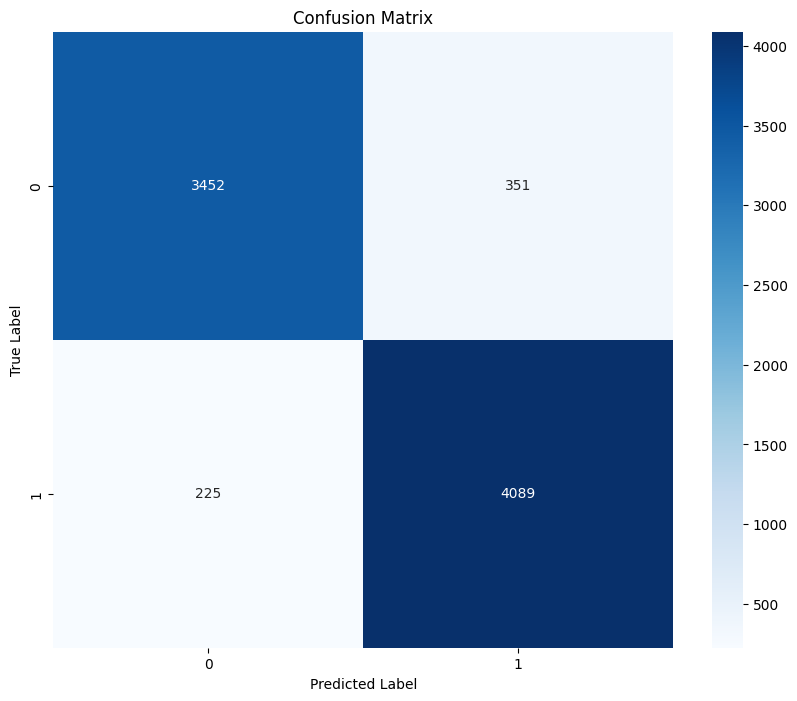

In [8]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(Y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
dump(model, 'naive_bayes_model_with_title.joblib')